## HACKATHON - AV

### `IMPORTING LIBRARIES`

In [1]:
# Import Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

### `IMPORTING DATASET`

In [2]:
# Import Train DataSet

data = pd.read_csv('train.csv')
print('Data Imported Successfully')

print("\n")

test_data = pd.read_csv('test.csv')
print('Test_Data Imported Successfully')

Data Imported Successfully


Test_Data Imported Successfully


### `EXPLORATION DATA / DATA PREPROCESSING / DATA CLEANING`

In [3]:
# Exploration Data 

data.shape

(9527, 23)

In [4]:
data.head(3)

,ID,Office_PIN,Application_Receipt_Date,Applicant_City_PIN,Applicant_Gender,Applicant_BirthDate,Applicant_Marital_Status,Applicant_Occupation,Applicant_Qualification,Manager_DOJ,...,Manager_Status,Manager_Gender,Manager_DoB,Manager_Num_Application,Manager_Num_Coded,Manager_Business,Manager_Num_Products,Manager_Business2,Manager_Num_Products2,Business_Sourced
0,FIN1000001,842001,4/16/2007,844120.0,M,12/19/1971,M,Others,Graduate,11-10-2005,...,Confirmation,M,2/17/1978,2.0,1.0,335249.0,28.0,335249.0,28.0,0
1,FIN1000002,842001,4/16/2007,844111.0,M,2/17/1983,S,Others,Class XII,11-10-2005,...,Confirmation,M,2/17/1978,2.0,1.0,335249.0,28.0,335249.0,28.0,1
2,FIN1000003,800001,4/16/2007,844101.0,M,1/16/1966,M,Business,Class XII,5/27/2006,...,Confirmation,M,03-03-1969,0.0,0.0,357184.0,24.0,357184.0,24.0,0


In [5]:
round(data.isnull().sum() / data.shape[0] * 100, 2)

ID                              0.00
Office_PIN                      0.00
Application_Receipt_Date        0.00
Applicant_City_PIN              1.02
Applicant_Gender                0.70
Applicant_BirthDate             0.77
Applicant_Marital_Status        0.77
Applicant_Occupation           12.82
Applicant_Qualification         0.90
Manager_DOJ                     7.17
Manager_Joining_Designation     7.17
Manager_Current_Designation     7.17
Manager_Grade                   7.17
Manager_Status                  7.17
Manager_Gender                  7.17
Manager_DoB                     7.17
Manager_Num_Application         7.17
Manager_Num_Coded               7.17
Manager_Business                7.17
Manager_Num_Products            7.17
Manager_Business2               7.17
Manager_Num_Products2           7.17
Business_Sourced                0.00
dtype: float64

> > __`VARIABLE IDENTIFICATION`__ 

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9527 entries, 0 to 9526
Data columns (total 23 columns):
ID                             9527 non-null object
Office_PIN                     9527 non-null int64
Application_Receipt_Date       9527 non-null object
Applicant_City_PIN             9430 non-null float64
Applicant_Gender               9460 non-null object
Applicant_BirthDate            9454 non-null object
Applicant_Marital_Status       9454 non-null object
Applicant_Occupation           8306 non-null object
Applicant_Qualification        9441 non-null object
Manager_DOJ                    8844 non-null object
Manager_Joining_Designation    8844 non-null object
Manager_Current_Designation    8844 non-null object
Manager_Grade                  8844 non-null float64
Manager_Status                 8844 non-null object
Manager_Gender                 8844 non-null object
Manager_DoB                    8844 non-null object
Manager_Num_Application        8844 non-null float64
Manager

Summary:

- We have date time feature which needs to be taken care properly.


- `ID` variable can be removed

In [7]:
data_copy = data.copy()

test_data_copy = test_data.copy()

In [8]:
data_copy.drop(columns = ['ID'],
               axis = 1,
               inplace = True)

test_data_copy.drop(columns = ['ID'],
                    axis = 1,
                    inplace = True)

> > __`UNIVARIANT ANLAYSIS`__

In [9]:
numerical_col = []
categorical_col = []

for col in data_copy.columns:
    if len(data_copy[col].unique()) < 10:
        categorical_col.append(col)
    else:
        numerical_col.append(col)
        
        
def categorical_univariant_plot(col, data, palette):
    print(col + " Frequency Count: ")
    print(data[col].value_counts())
    
    plt.figure(figsize = (10,6))
    sns.countplot(x = col,
                  data = data,
                  palette = palette)
    plt.xlabel(col)
    plt.xticks(rotation = 45)
    plt.ylabel("Frequency")
    plt.title(col + " vs Frequency")
    plt.show()
    
    
def continuous_univariant_plot(col, data):
    print(data[col].describe(),"\n")
    
    plt.figure(figsize = (20,5))

    plt.subplot(1,3,1)
    sns.kdeplot(data[col], shade=True)

    plt.subplot(1,3,2)
    sns.distplot(data[col])

    plt.subplot(1,3,3)
    sns.boxplot(data[col], orient = 'horizontal')

    print("Skewness : {}, Kurtosis : {}".format(data[col].skew(), data[col].kurtosis()))
    plt.show()
    
    
def continuous_null_univariant_plot(col,data):
    print(data[col].describe(),"\n")
    
    plt.figure(figsize = (20,5))

    plt.subplot(1,2,1)
    sns.kdeplot(data[col], shade=True, )

    plt.subplot(1,2,2)
    sns.boxplot(data[col], orient = 'horizontal')

    print("Skewness : {}, Kurtosis : {}".format(data[col].skew(), data[col].kurtosis()))
    plt.show()

Applicant_Gender Frequency Count: 
M    7179
F    2281
Name: Applicant_Gender, dtype: int64


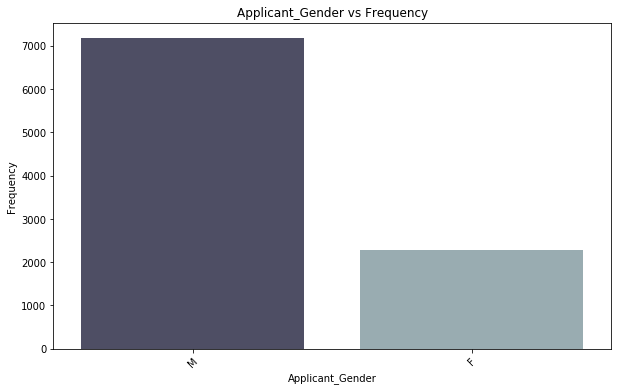

Applicant_Marital_Status Frequency Count: 
M    6177
S    3267
W       6
D       4
Name: Applicant_Marital_Status, dtype: int64


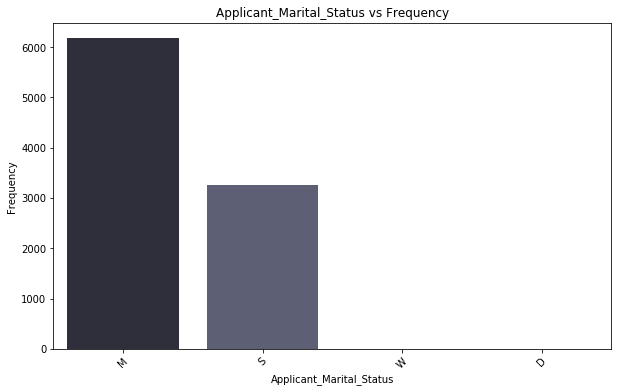

Applicant_Occupation Frequency Count: 
Salaried         3787
Business         2303
Others           1966
Self Employed     149
Student           101
Name: Applicant_Occupation, dtype: int64


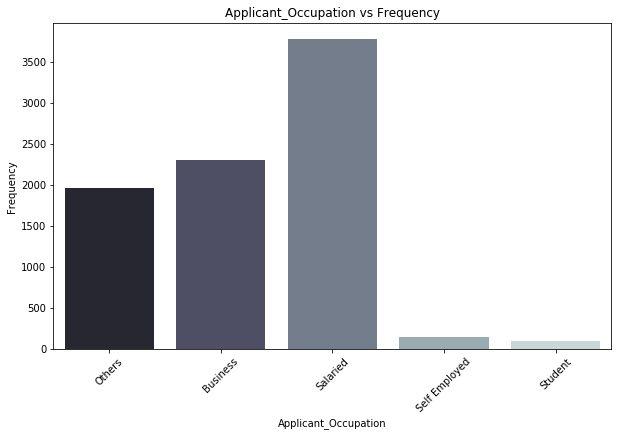

Manager_Joining_Designation Frequency Count: 
Level 1    4632
Level 2    2787
Level 3    1146
Level 4     200
Other        58
Level 6      18
Level 7       2
Level 5       1
Name: Manager_Joining_Designation, dtype: int64


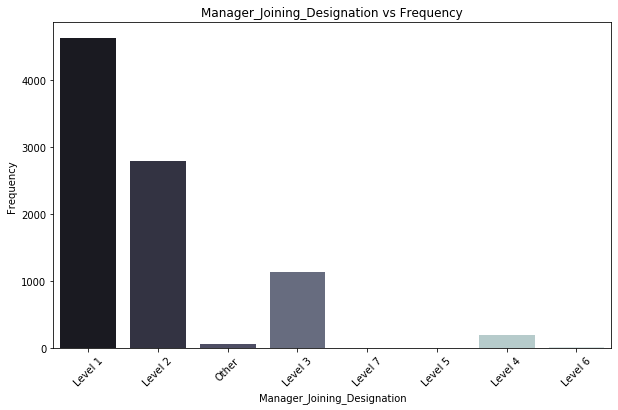

Manager_Current_Designation Frequency Count: 
Level 2    3208
Level 1    2479
Level 3    2033
Level 4    1031
Level 5      93
Name: Manager_Current_Designation, dtype: int64


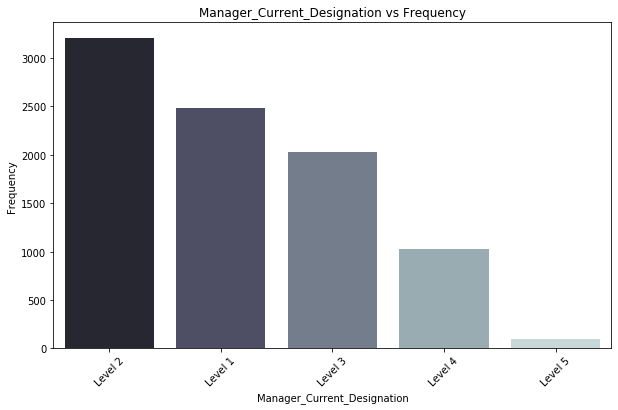

Manager_Status Frequency Count: 
Confirmation    5277
Probation       3567
Name: Manager_Status, dtype: int64


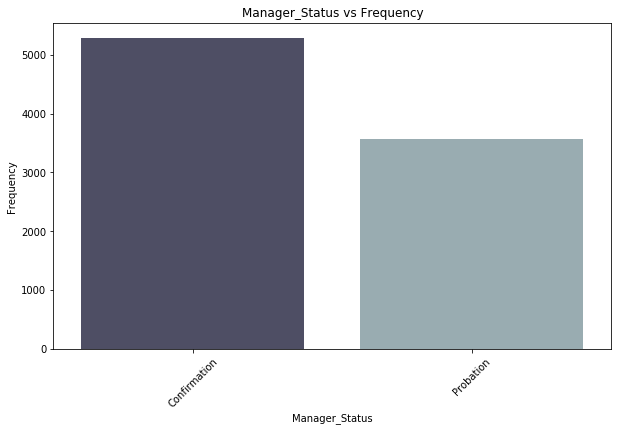

Manager_Gender Frequency Count: 
M    7627
F    1217
Name: Manager_Gender, dtype: int64


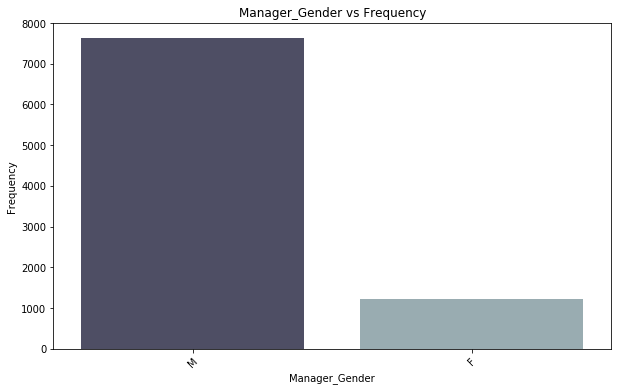

Business_Sourced Frequency Count: 
0    6260
1    3267
Name: Business_Sourced, dtype: int64


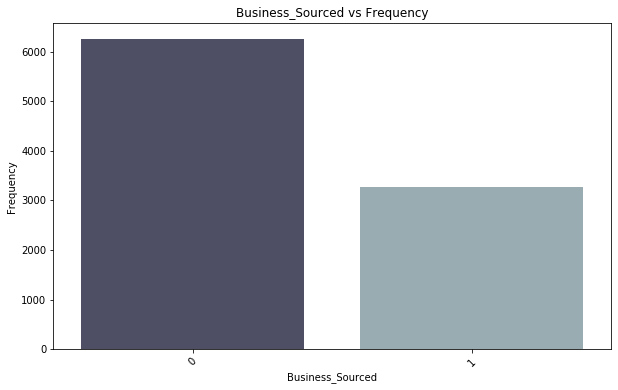

In [10]:
for col in categorical_col:
    categorical_univariant_plot(col, data_copy, 'bone')

Summary : 
    
   - There are more number of males as compared to females in our dataset.
 
 
   - There are various maritial status been observed 
     
          (Divorced < Widow < Single < Married).


   - Occupation Status
    
          (Student < Self-Employed < Others < Business < Salaried).
    
    
   - Most of the managers joined the company under Level 1 title. Company had 5 levels of designation that could be assigned to managers. Level 1 - 5 where Level 2 type of managers where more as compared to others.
   
          (Level 2 > Leve1 1 > Level 3 > Level 4 > Level 5)
    
    
   - Most of the manager's status was oserved to be confirmed and out of them most where males.
   
   
   - The target class showed us some imbalance occuring.

In [11]:
a = np.where(data.dtypes == 'object')
data.iloc[a].isnull().sum()

ID                             0
Office_PIN                     0
Application_Receipt_Date       0
Applicant_City_PIN             0
Applicant_Gender               0
Applicant_BirthDate            0
Applicant_Marital_Status       0
Applicant_Occupation           0
Applicant_Qualification        0
Manager_DOJ                    0
Manager_Joining_Designation    0
Manager_Current_Designation    0
Manager_Grade                  0
Manager_Status                 0
Manager_Gender                 0
Manager_DoB                    0
Manager_Num_Application        0
Manager_Num_Coded              0
Manager_Business               0
Manager_Num_Products           0
Manager_Business2              0
Manager_Num_Products2          0
Business_Sourced               0
dtype: int64

> > __`BIVARIANT ANALYSIS`__

In [12]:
def categorical_categorical(col1, col2, data):
    
    a = pd.crosstab(index = [data[col1]], columns = [data[col2]])
    print(a.unstack())
    
    a.plot(kind = 'bar', stacked = True)
    plt.title(col1 + " Vs Business_Sourced", fontsize = 10)
    plt.legend(loc = 'upper left', bbox_to_anchor = (1,1))

Business_Sourced  Applicant_Gender
0                 F                   1402
                  M                   4791
1                 F                    879
                  M                   2388
dtype: int64
Business_Sourced  Applicant_Marital_Status
0                 D                              2
                  M                           4021
                  S                           2161
                  W                              3
1                 D                              2
                  M                           2156
                  S                           1106
                  W                              3
dtype: int64
Business_Sourced  Applicant_Occupation
0                 Business                1528
                  Others                  1241
                  Salaried                2456
                  Self Employed            149
                  Student                   52
1                 Business                

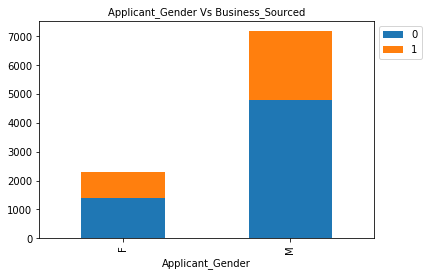

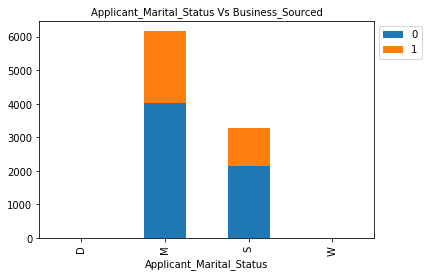

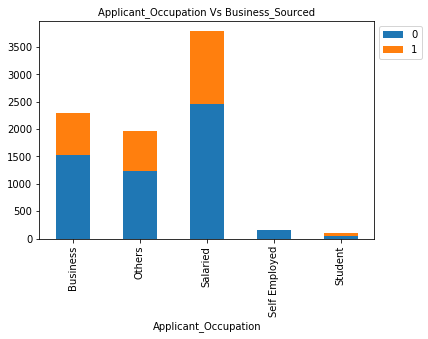

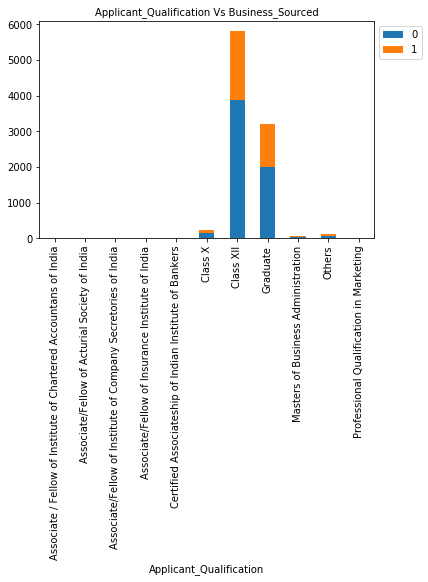

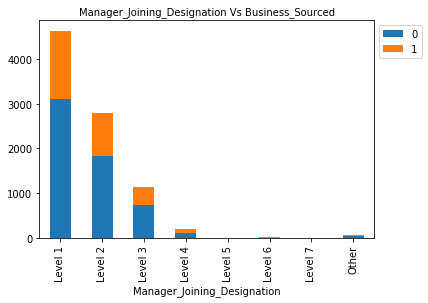

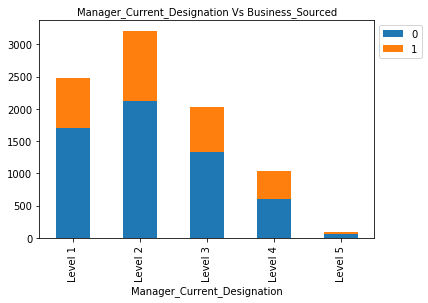

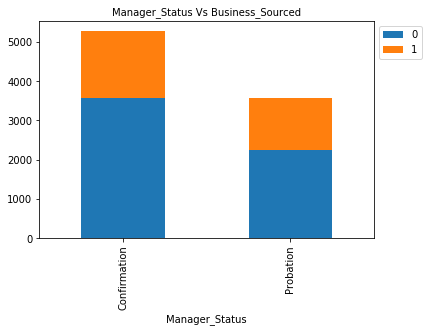

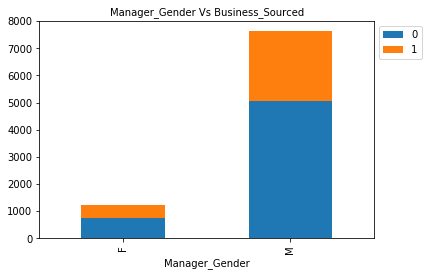

In [13]:
categorical_features = [
 'Applicant_Gender',
 'Applicant_Marital_Status',
 'Applicant_Occupation',
 'Applicant_Qualification',
 'Manager_Joining_Designation',
 'Manager_Current_Designation',
 'Manager_Status',
 'Manager_Gender']

for col1 in categorical_features:
    categorical_categorical(col1, 'Business_Sourced', data_copy)

 - More nos of males where hired as compared to females. Out of the hired candidates most of them where married.
 
 
 - Most of applicant who joined where salaried employees.
 
 
 - As the manager's joining designation level increased, nos of candidates getting selected decreased. Also the manager's who where currently at level 2 sourced more candidates. Managers who are currently at higher level looks like, they are not intrested in hiring candidates or their interviews where tough or did not went well which can be seen from the visualization as well.
 
 
 - 67 % of the managers who where permanent (3562 (0) + 1715 (1) = 5277) did not hired candidates where as only 33 % of managers hire the candidates and those managers are majorily belonging to Level 2 as seen from crosstab.
 
 
 - It was seen that most of managers where males.

In [14]:
numerical_col

['Office_PIN',
 'Application_Receipt_Date',
 'Applicant_City_PIN',
 'Applicant_BirthDate',
 'Applicant_Qualification',
 'Manager_DOJ',
 'Manager_Grade',
 'Manager_DoB',
 'Manager_Num_Application',
 'Manager_Num_Coded',
 'Manager_Business',
 'Manager_Num_Products',
 'Manager_Business2',
 'Manager_Num_Products2']

count    8844.000000
mean        1.939733
std         2.150529
min         0.000000
25%         0.000000
50%         1.000000
75%         3.000000
max        22.000000
Name: Manager_Num_Application, dtype: float64 

Skewness : 1.5361887397547092, Kurtosis : 3.689340910369327


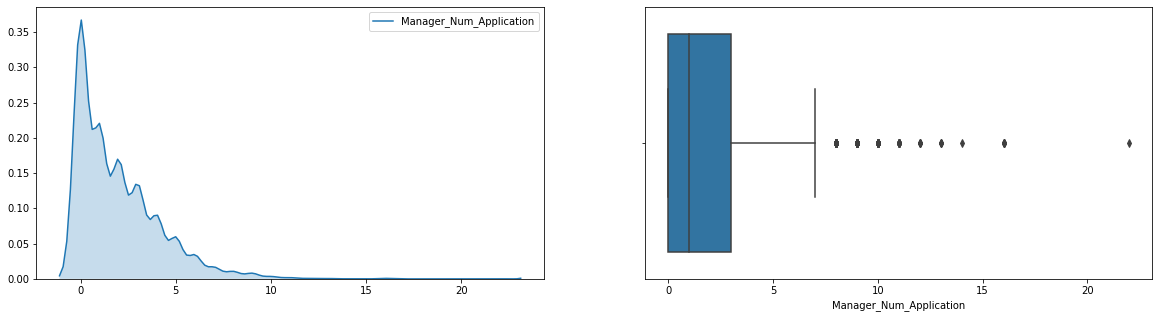

count    8844.000000
mean        0.758933
std         1.188644
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         9.000000
Name: Manager_Num_Coded, dtype: float64 

Skewness : 1.975780583107233, Kurtosis : 4.693823949185634


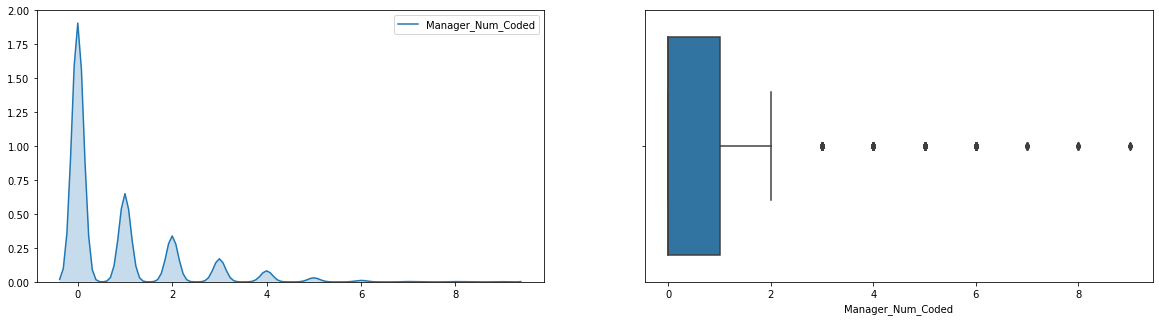

count    8.844000e+03
mean     1.843710e+05
std      2.747163e+05
min     -2.652890e+05
25%      0.000000e+00
50%      1.021780e+05
75%      2.471165e+05
max      3.578265e+06
Name: Manager_Business, dtype: float64 

Skewness : 3.366590282998834, Kurtosis : 18.156423786391475


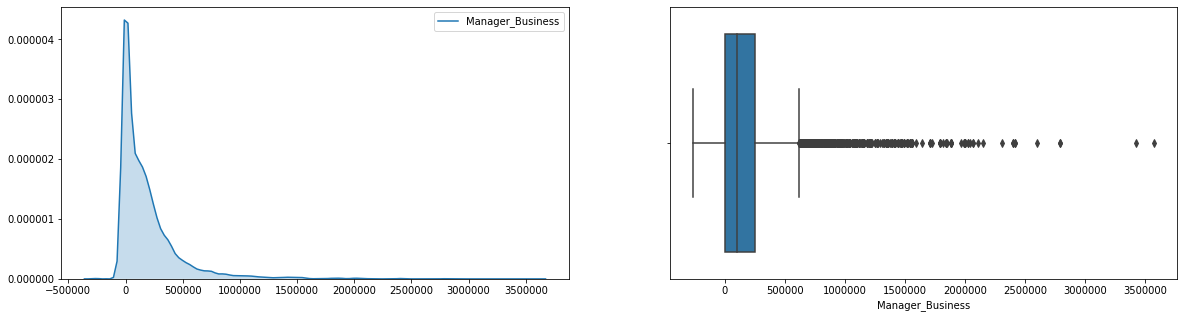

count    8844.000000
mean        7.152307
std         8.439351
min         0.000000
25%         0.000000
50%         5.000000
75%        11.000000
max       101.000000
Name: Manager_Num_Products, dtype: float64 

Skewness : 2.053397802420272, Kurtosis : 8.452121925609461


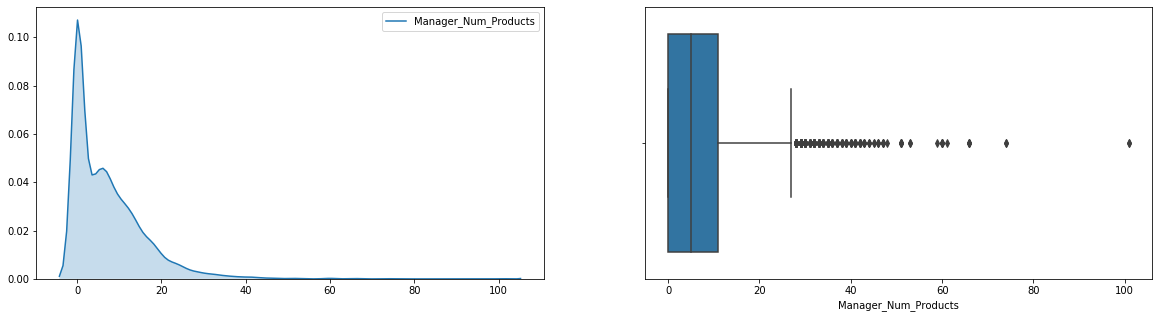

count    8844.000000
mean        7.131275
std         8.423597
min         0.000000
25%         0.000000
50%         5.000000
75%        11.000000
max       101.000000
Name: Manager_Num_Products2, dtype: float64 

Skewness : 2.0642876200889018, Kurtosis : 8.552072165568347


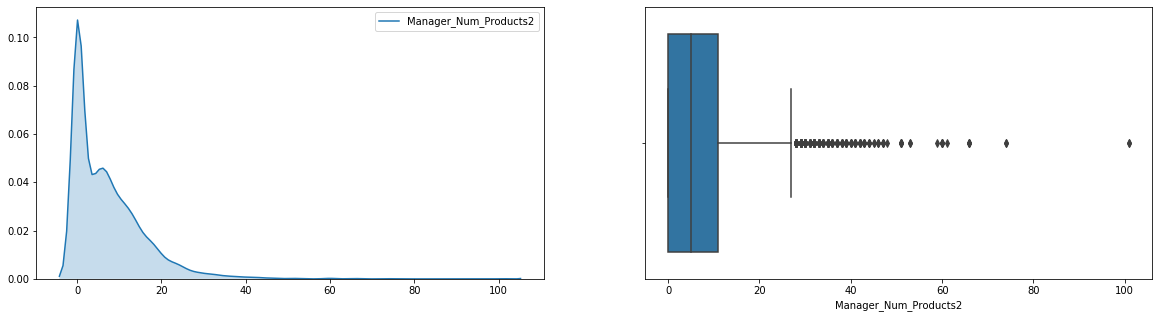

count    8.844000e+03
mean     1.829263e+05
std      2.718021e+05
min     -2.652890e+05
25%      0.000000e+00
50%      1.017140e+05
75%      2.464612e+05
max      3.578265e+06
Name: Manager_Business2, dtype: float64 

Skewness : 3.3824844891169197, Kurtosis : 18.58394594399292


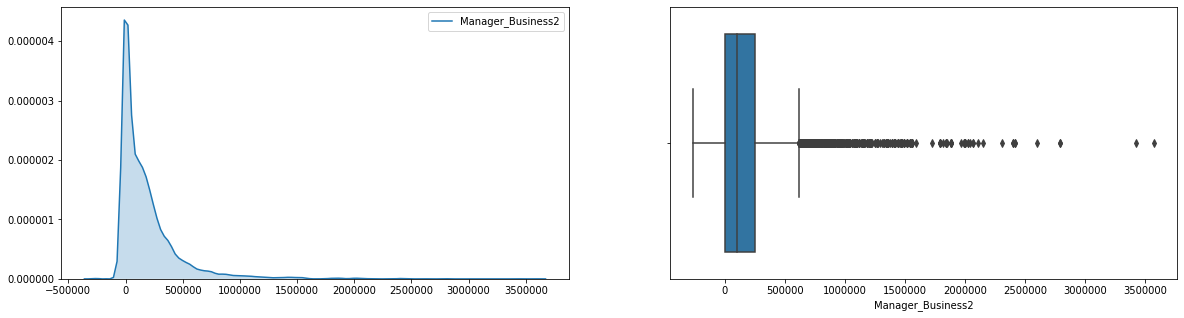

In [15]:
numerical_columns = ['Manager_Num_Application',
                     'Manager_Num_Coded',
                     'Manager_Business',
                     'Manager_Num_Products',
                     'Manager_Num_Products2',
                     'Manager_Business2']

for col in numerical_columns:
    continuous_null_univariant_plot(col, data_copy)

     - There outliers been observed which needs to be taken care in further steps.

<br>

In [16]:
# Applicant_Qualification 

mapping = {
    'Masters of Business Administration'                               : 'Others',
    'Associate / Fellow of Institute of Chartered Accountans of India' : 'Others',
    'Associate/Fellow of Institute of Company Secretories of India'    : 'Others', 
    'Certified Associateship of Indian Institute of Bankers'           : 'Others',
    'Associate/Fellow of Acturial Society of India'                    : 'Others',
    'Associate/Fellow of Insurance Institute of India'                 : 'Others',
    'Professional Qualification in Marketing'                          : 'Others',
    'Others'                                                           : 'Others',
    'Class X'                                                          : 'Class X',
    'Class XII'                                                        : 'Class XII',
    'Graduate'                                                         : 'Graduate'
}

data_copy['Applicant_Qualification'] = data_copy['Applicant_Qualification'].map(mapping)

test_data_copy['Applicant_Qualification'] = test_data_copy['Applicant_Qualification'].map(mapping)

In [17]:
# Applicant_Marital_Status

mapping1 = {
    'M' : 'M',
    'S' : 'S',
    'W' : 'Others',
    'D' : 'Others'
}

data_copy['Applicant_Marital_Status'] = data_copy['Applicant_Marital_Status'].map(mapping1)

test_data_copy['Applicant_Marital_Status'] = test_data_copy['Applicant_Marital_Status'].map(mapping1)

<br>

> > __`HANDLING OUTLIERS`__

   - `Manager_Num_Coded` and `Manager_Num_Applicant` are the number of agent / applicants which are sourced and may be relaistic value depending upo the scenario so removing outllier from them can also some times increase the skewness as well when we do log transform or take sqrt .

In [18]:
#a = data_copy['Manager_Business'].map(lambda x : np.log(x) if x > 0 else x)

In [19]:
#a.describe()

In [20]:
#a.plot(kind = 'hist')

In [21]:
#b = data_copy['Manager_Business'].map(lambda x : np.sqrt(x) if x > 0 else x)

In [22]:
#b.plot(kind = 'hist')

In [23]:
'''
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.title('With Outlier')
sns.boxplot(x=data_copy['Manager_Business'])
plt.show()

# identifying the quantile range 
Q1 = data_copy['Manager_Business'].quantile(0.25)
Q3 = data_copy['Manager_Business'].quantile(0.75)
IQR = Q3 - Q1

# removing the outlier range 
data_copy = data_copy[~((data_copy['Manager_Business'] < (Q1 - 1.5 * IQR)) | (data_copy['Manager_Business'] > (Q3 + 1.5 * IQR)))]

# after removing the outlier
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.title('Without Outlier')
sns.boxplot(x=data_copy['Manager_Business'])
plt.show()

'''

"\nimport seaborn as sns\nimport matplotlib.pyplot as plt\nplt.figure(figsize=(10,5))\nplt.title('With Outlier')\nsns.boxplot(x=data_copy['Manager_Business'])\nplt.show()\n\n# identifying the quantile range \nQ1 = data_copy['Manager_Business'].quantile(0.25)\nQ3 = data_copy['Manager_Business'].quantile(0.75)\nIQR = Q3 - Q1\n\n# removing the outlier range \ndata_copy = data_copy[~((data_copy['Manager_Business'] < (Q1 - 1.5 * IQR)) | (data_copy['Manager_Business'] > (Q3 + 1.5 * IQR)))]\n\n# after removing the outlier\nimport seaborn as sns\nimport matplotlib.pyplot as plt\nplt.figure(figsize=(10,5))\nplt.title('Without Outlier')\nsns.boxplot(x=data_copy['Manager_Business'])\nplt.show()\n\n"

In [24]:
# data_copy.shape

    - Removing outliers with IQR removed 530 records (9537 - 8997) records. We can try replacing outliers with median.

##### `MANAGER_BUSINESS`

In [25]:
# Manager Business

print(data_copy['Manager_Business'].quantile(0.50))
print(data_copy['Manager_Business'].quantile(0.95))

102178.0
692513.0


In [26]:
print(test_data_copy['Manager_Business'].quantile(0.50))
print(test_data_copy['Manager_Business'].quantile(0.95))

50026.0
394340.0


In [27]:
data_copy['Manager_Business'] = np.where(data_copy['Manager_Business'] > 692513.0 ,102178.0 ,data_copy['Manager_Business'])

test_data_copy['Manager_Business'] = np.where(test_data_copy['Manager_Business'] > 394340.0, 50026.0, test_data_copy['Manager_Business'])

count      8844.000000
mean     135040.734848
std      153526.736546
min     -265289.000000
25%           0.000000
50%      102178.000000
75%      210253.500000
max      692513.000000
Name: Manager_Business, dtype: float64 

Skewness : 1.2751930723954887, Kurtosis : 1.144547026384628


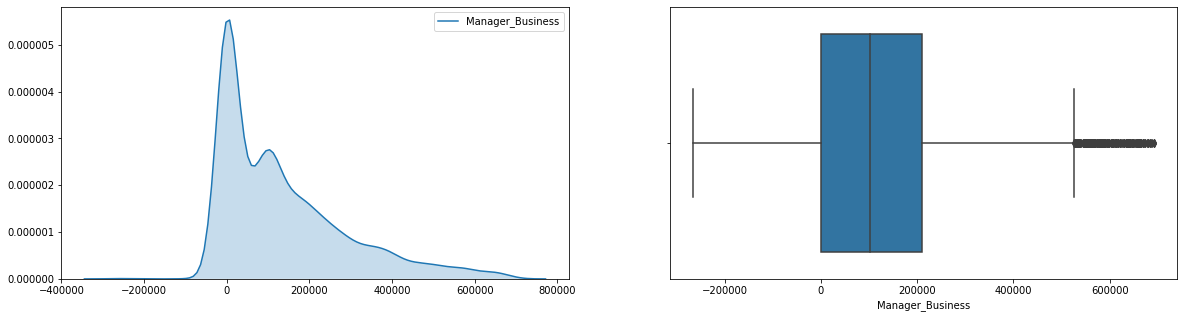

In [28]:
continuous_null_univariant_plot('Manager_Business', data_copy)

count      4221.000000
mean      83102.223881
std       99997.363154
min      -31969.000000
25%           0.000000
50%       50026.000000
75%      147681.000000
max      394340.000000
Name: Manager_Business, dtype: float64 

Skewness : 1.0528132551241556, Kurtosis : 0.0326849371836877


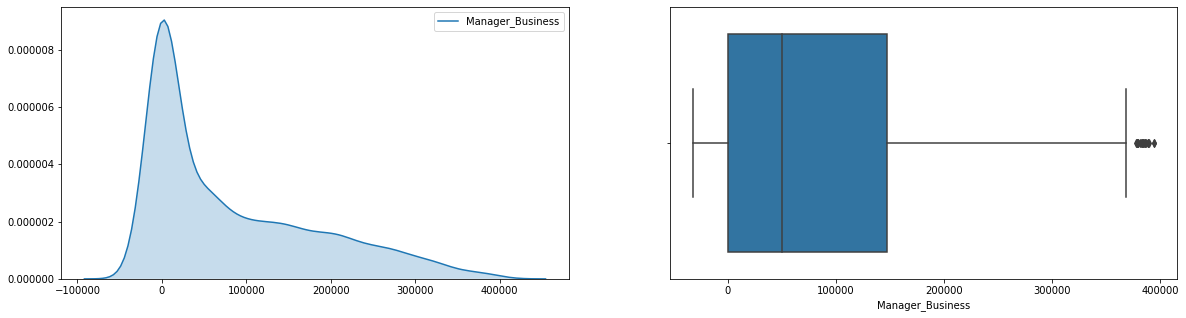

In [29]:
continuous_null_univariant_plot('Manager_Business', test_data_copy)

<br>

##### `MANAGER_NUM_PRODUCTS`

In [30]:
# Manager_Num_Products

print(data_copy['Manager_Num_Products'].quantile(0.50))
print(data_copy['Manager_Num_Products'].quantile(0.95))

5.0
23.0


In [31]:
print(test_data_copy['Manager_Num_Products'].quantile(0.50))
print(test_data_copy['Manager_Num_Products'].quantile(0.95))

2.0
13.0


In [32]:
data_copy['Manager_Num_Products'] = np.where(data_copy['Manager_Num_Products'] > 23 ,5 ,data_copy['Manager_Num_Products'])

test_data_copy['Manager_Num_Products'] = np.where(test_data_copy['Manager_Num_Products'] > 13, 2, test_data_copy['Manager_Num_Products'])

count    8844.000000
mean        5.916667
std         6.081838
min         0.000000
25%         0.000000
50%         5.000000
75%        10.000000
max        23.000000
Name: Manager_Num_Products, dtype: float64 

Skewness : 0.8613235201430787, Kurtosis : -0.18697086248398698


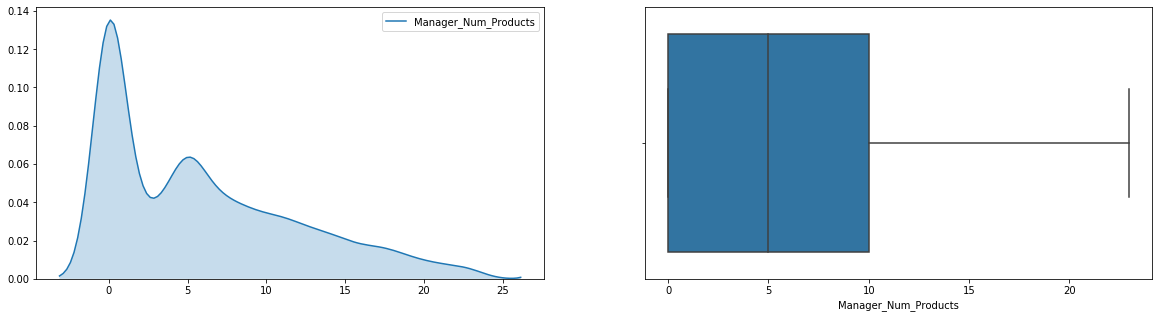

In [33]:
continuous_null_univariant_plot('Manager_Num_Products', data_copy)

count    4221.000000
mean        3.232172
std         3.771509
min         0.000000
25%         0.000000
50%         2.000000
75%         6.000000
max        13.000000
Name: Manager_Num_Products, dtype: float64 

Skewness : 0.932741640056159, Kurtosis : -0.32317013052013444


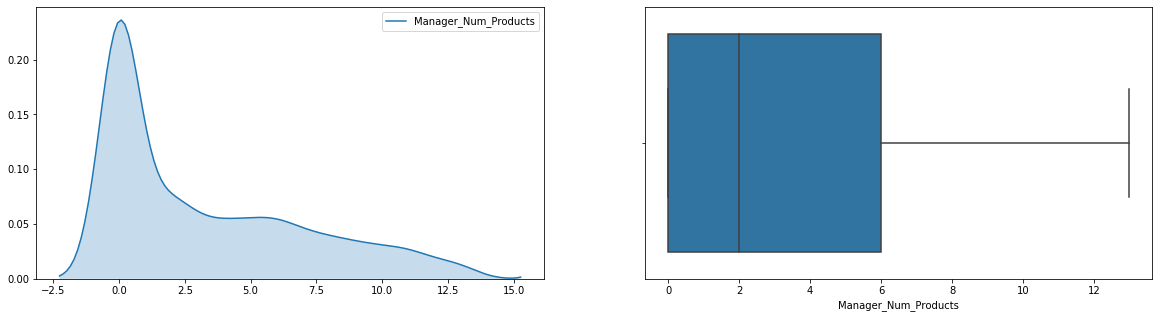

In [34]:
continuous_null_univariant_plot('Manager_Num_Products', test_data_copy)

<br>

##### `MANAGER_BUSINESS2`

In [35]:
# Manager_Business2

print(data_copy['Manager_Business2'].quantile(0.50))
print(data_copy['Manager_Business2'].quantile(0.95))

101714.0
676045.8500000014


In [36]:
print(test_data_copy['Manager_Business2'].quantile(0.50))
print(test_data_copy['Manager_Business2'].quantile(0.95))

46537.0
334214.0


In [37]:
data_copy['Manager_Business2'] = np.where(data_copy['Manager_Business2'] > 676045.8500000014, 101714.0, data_copy['Manager_Business2'])

test_data_copy['Manager_Business2'] = np.where(test_data_copy['Manager_Business2'] > 334214.0, 46537.0, test_data_copy['Manager_Business2'])

count      8844.000000
mean     134240.933853
std      152423.325476
min     -265289.000000
25%           0.000000
50%      101714.000000
75%      209416.750000
max      672764.000000
Name: Manager_Business2, dtype: float64 

Skewness : 1.2646666491260345, Kurtosis : 1.0947004641705993


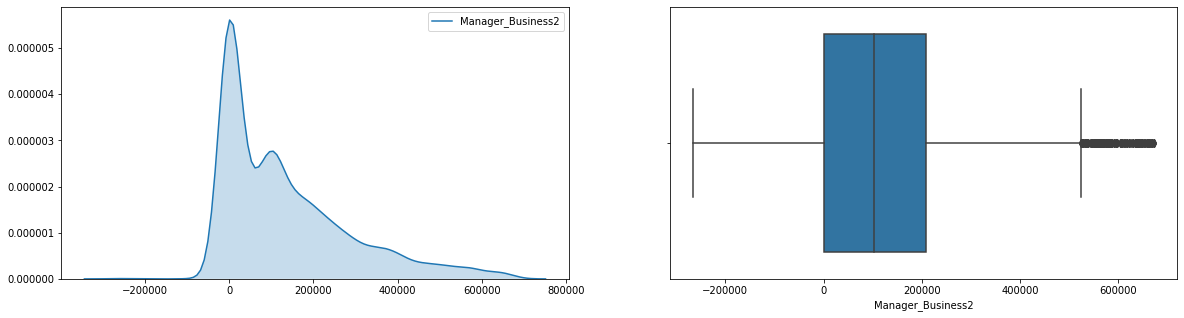

In [38]:
continuous_null_univariant_plot('Manager_Business2', data_copy)

count      4221.000000
mean      74049.081971
std       89055.879243
min      -31969.000000
25%           0.000000
50%       46537.000000
75%      130954.000000
max      334214.000000
Name: Manager_Business2, dtype: float64 

Skewness : 1.0601039967199066, Kurtosis : 0.042009599674262876


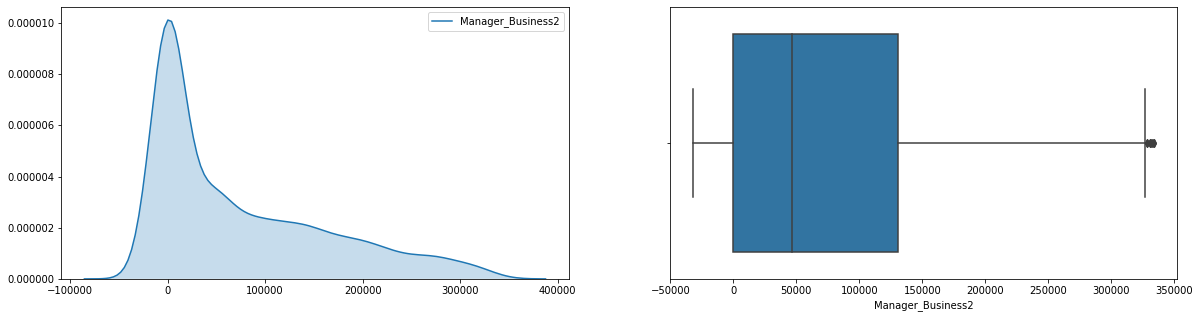

In [39]:
continuous_null_univariant_plot('Manager_Business2', test_data_copy)

<br>

##### `MANAGER_NUM_PRODUCTS2`

In [40]:
# Manager_Num_Products2

print(data_copy['Manager_Num_Products2'].quantile(0.50))
print(data_copy['Manager_Num_Products2'].quantile(0.95))

5.0
23.0


In [41]:
# Manager_Num_Products2

print(test_data_copy['Manager_Num_Products2'].quantile(0.50))
print(test_data_copy['Manager_Num_Products2'].quantile(0.95))

2.0
12.0


In [42]:
data_copy['Manager_Num_Products2'] = np.where(data_copy['Manager_Num_Products2'] > 23.0, 5.0, data_copy['Manager_Num_Products2'])

test_data_copy['Manager_Num_Products2'] = np.where(test_data_copy['Manager_Num_Products2'] > 12.0, 2.0, test_data_copy['Manager_Num_Products2'])

count    8844.000000
mean        5.913727
std         6.085199
min         0.000000
25%         0.000000
50%         5.000000
75%        10.000000
max        23.000000
Name: Manager_Num_Products2, dtype: float64 

Skewness : 0.8635359621368107, Kurtosis : -0.18331786420458052


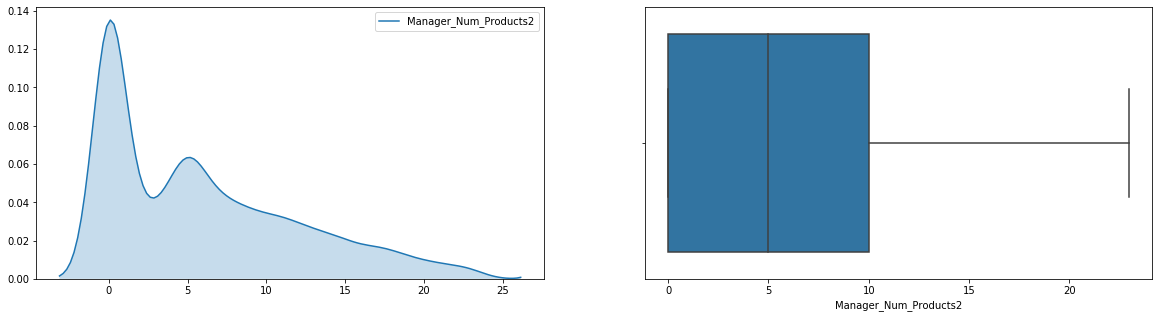

In [43]:
continuous_null_univariant_plot('Manager_Num_Products2', data_copy)

count    4221.000000
mean        2.978204
std         3.464717
min         0.000000
25%         0.000000
50%         2.000000
75%         5.000000
max        12.000000
Name: Manager_Num_Products2, dtype: float64 

Skewness : 0.9281431760163595, Kurtosis : -0.32519883274990713


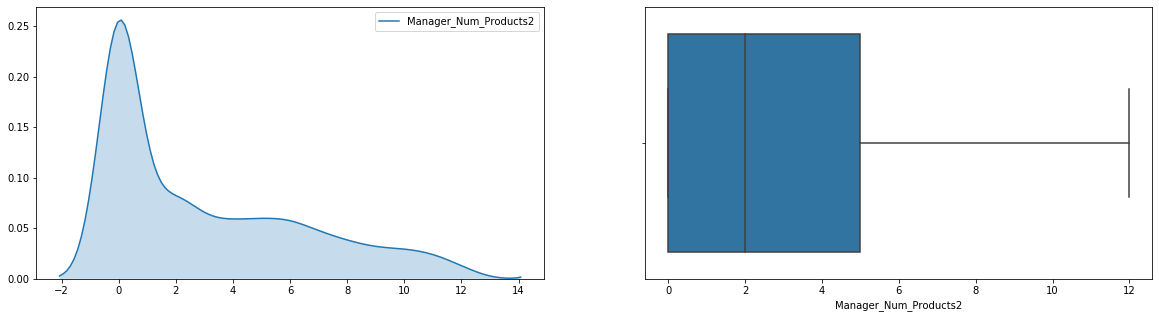

In [44]:
continuous_null_univariant_plot('Manager_Num_Products2', test_data_copy)

<br>

> > __`HANDLING MISSING VALUES`__

In [45]:
data_copy.isnull().sum()

Office_PIN                        0
Application_Receipt_Date          0
Applicant_City_PIN               97
Applicant_Gender                 67
Applicant_BirthDate              73
Applicant_Marital_Status         73
Applicant_Occupation           1221
Applicant_Qualification          86
Manager_DOJ                     683
Manager_Joining_Designation     683
Manager_Current_Designation     683
Manager_Grade                   683
Manager_Status                  683
Manager_Gender                  683
Manager_DoB                     683
Manager_Num_Application         683
Manager_Num_Coded               683
Manager_Business                683
Manager_Num_Products            683
Manager_Business2               683
Manager_Num_Products2           683
Business_Sourced                  0
dtype: int64

In [46]:
test_data_copy.isnull().sum()

Office_PIN                        0
Application_Receipt_Date          0
Applicant_City_PIN               34
Applicant_Gender                 22
Applicant_BirthDate              23
Applicant_Marital_Status         30
Applicant_Occupation           1004
Applicant_Qualification          45
Manager_DOJ                     824
Manager_Joining_Designation     824
Manager_Current_Designation     824
Manager_Grade                   824
Manager_Status                  824
Manager_Gender                  824
Manager_DoB                     824
Manager_Num_Application         824
Manager_Num_Coded               824
Manager_Business                824
Manager_Num_Products            824
Manager_Business2               824
Manager_Num_Products2           824
dtype: int64

In [47]:
missing_col = ['Manager_Num_Application', 'Manager_Num_Coded', 'Manager_Business', 'Manager_Num_Products',
               'Manager_Business2','Manager_Num_Products2']

for col in missing_col:
    data_copy[col].fillna(value = 0, inplace = True)
    
for col in missing_col:
    test_data_copy[col].fillna(value = 0, inplace = True)

In [48]:
data_copy['Applicant_Occupation'].fillna(value = 'Salaried',
                                         inplace = True)

data_copy['Applicant_Qualification'].fillna(value = 'Class XII',
                                            inplace = True)

data_copy['Applicant_Marital_Status'].fillna(value = 'M',
                                             inplace = True)

data_copy['Manager_Joining_Designation'].fillna(value = 'Level 1',
                                                inplace = True)

data_copy['Manager_Current_Designation'].fillna(value = 'Level 2',
                                                inplace = True)

data_copy['Manager_Grade'].fillna(value = 3.0,
                                  inplace = True)

data_copy['Manager_Status'].fillna(value = 'Confirmation',
                                   inplace = True)

data_copy['Manager_Gender'].fillna(value = 'M',
                                   inplace = True)

data_copy['Applicant_Gender'].fillna(value = 'M',
                                     inplace = True)

data_copy['Applicant_City_PIN'].fillna(value = -999,
                                       inplace = True)

data_copy['Applicant_BirthDate'].fillna(value = -999,
                                        inplace = True)

data_copy['Manager_DOJ'].fillna(value = -999,
                                inplace = True)

data_copy['Manager_DoB'].fillna(value = -999,
                                inplace = True)

In [49]:
test_data_copy['Applicant_Occupation'].fillna(value = 'Salaried',
                                         inplace = True)

test_data_copy['Applicant_Qualification'].fillna(value = 'Class XII',
                                            inplace = True)

test_data_copy['Applicant_Marital_Status'].fillna(value = 'M',
                                             inplace = True)

test_data_copy['Manager_Joining_Designation'].fillna(value = 'Level 1',
                                                inplace = True)

test_data_copy['Manager_Current_Designation'].fillna(value = 'Level 2',
                                                inplace = True)

test_data_copy['Manager_Grade'].fillna(value = 3.0,
                                  inplace = True)

test_data_copy['Manager_Status'].fillna(value = 'Confirmation',
                                   inplace = True)

test_data_copy['Manager_Gender'].fillna(value = 'M',
                                   inplace = True)

test_data_copy['Applicant_Gender'].fillna(value = 'M',
                                     inplace = True)

test_data_copy['Applicant_City_PIN'].fillna(value = -999,
                                       inplace = True)

test_data_copy['Applicant_BirthDate'].fillna(value = -999,
                                        inplace = True)

test_data_copy['Manager_DOJ'].fillna(value = -999,
                                inplace = True)

test_data_copy['Manager_DoB'].fillna(value = -999,
                                inplace = True)

In [50]:
test_data_copy.isnull().sum()

Office_PIN                     0
Application_Receipt_Date       0
Applicant_City_PIN             0
Applicant_Gender               0
Applicant_BirthDate            0
Applicant_Marital_Status       0
Applicant_Occupation           0
Applicant_Qualification        0
Manager_DOJ                    0
Manager_Joining_Designation    0
Manager_Current_Designation    0
Manager_Grade                  0
Manager_Status                 0
Manager_Gender                 0
Manager_DoB                    0
Manager_Num_Application        0
Manager_Num_Coded              0
Manager_Business               0
Manager_Num_Products           0
Manager_Business2              0
Manager_Num_Products2          0
dtype: int64

In [51]:
data_copy.isnull().sum()

Office_PIN                     0
Application_Receipt_Date       0
Applicant_City_PIN             0
Applicant_Gender               0
Applicant_BirthDate            0
Applicant_Marital_Status       0
Applicant_Occupation           0
Applicant_Qualification        0
Manager_DOJ                    0
Manager_Joining_Designation    0
Manager_Current_Designation    0
Manager_Grade                  0
Manager_Status                 0
Manager_Gender                 0
Manager_DoB                    0
Manager_Num_Application        0
Manager_Num_Coded              0
Manager_Business               0
Manager_Num_Products           0
Manager_Business2              0
Manager_Num_Products2          0
Business_Sourced               0
dtype: int64

    - We have hadled missing values and hence we can proceed ahead.

 > > __`HANDLING TIMESERIES DATA`__ 

    - Application_Receipt_Date / Applicant Birthdate 
    
    - Manager DOJ /  Manager DOB
    

##### `APPLICANT_RECEIPT_DATE`

In [52]:
data_copy['Application_Receipt_Date'] = pd.to_datetime(data_copy['Application_Receipt_Date'])

test_data_copy['Application_Receipt_Date'] = pd.to_datetime(test_data_copy['Application_Receipt_Date'])

In [53]:
# Date_Of_Joining
data_copy['Applicant_Date_Of_Joining']  = data_copy['Application_Receipt_Date'].map(lambda x : x.day)

# Month_Of_Joining
data_copy['Applicant_Month_Of_Joining'] = data_copy['Application_Receipt_Date'].map(lambda x : x.month)

# Year_Of_Joining
data_copy['Applicant_Year_Of_Joining'] = data_copy['Application_Receipt_Date'].map(lambda x : x.year)

# Day_Of_Week (0 - 6 -> Mon -> Sat)
data_copy['Applicant_Day_Of_Week'] = data_copy['Application_Receipt_Date'].map(lambda x : x.dayofweek)

# Weekend
data_copy['Applicant_Weekend'] = np.where(data_copy['Applicant_Day_Of_Week'].isin([5,6]),1,0)

# Weekday
data_copy['Applicant_Weekday'] = np.where(data_copy['Applicant_Day_Of_Week'].isin([0,1,2,3,4]),1,0)

In [54]:
# Date_Of_Joining
test_data_copy['Applicant_Date_Of_Joining']  = test_data_copy['Application_Receipt_Date'].map(lambda x : x.day)

# Month_Of_Joining
test_data_copy['Applicant_Month_Of_Joining'] = test_data_copy['Application_Receipt_Date'].map(lambda x : x.month)

# Year_Of_Joining
test_data_copy['Applicant_Year_Of_Joining'] = test_data_copy['Application_Receipt_Date'].map(lambda x : x.year)

# Day_Of_Week (0 - 6 -> Mon -> Sat)
test_data_copy['Applicant_Day_Of_Week'] = test_data_copy['Application_Receipt_Date'].map(lambda x : x.dayofweek)

# Weekend
test_data_copy['Applicant_Weekend'] = np.where(test_data_copy['Applicant_Day_Of_Week'].isin([5,6]),1,0)

# Weekday
test_data_copy['Applicant_Weekday'] = np.where(test_data_copy['Applicant_Day_Of_Week'].isin([0,1,2,3,4]),1,0)

##### `APPLICANT_BIRTHDATE`

In [55]:
data_copy['Applicant_BirthDate'] = pd.to_datetime(data_copy['Applicant_BirthDate'])

test_data_copy['Applicant_BirthDate'] = pd.to_datetime(test_data_copy['Applicant_BirthDate'])

In [56]:
# Applicant_Day_Of_Birth
data_copy['Applicant_Birth_Day']    = data_copy['Applicant_BirthDate'].map(lambda x : x.day)

# Applicant_Birth_Month
data_copy['Applicant_Birth_Month']  = data_copy['Applicant_BirthDate'].map(lambda x : x.month)

# Applicant_Birth_Year
data_copy['Applicant_Birth_Year']   = data_copy['Applicant_BirthDate'].map(lambda x : x.year)

# Applicant_Birth_Day
data_copy['Applicant_Birth_Day']    = data_copy['Applicant_BirthDate'].map(lambda x : x.day_name())

In [57]:
# Applicant_Day_Of_Birth
test_data_copy['Applicant_Birth_Day']    = test_data_copy['Applicant_BirthDate'].map(lambda x : x.day)

# Applicant_Birth_Month
test_data_copy['Applicant_Birth_Month']  = test_data_copy['Applicant_BirthDate'].map(lambda x : x.month)

# Applicant_Birth_Year
test_data_copy['Applicant_Birth_Year']   = test_data_copy['Applicant_BirthDate'].map(lambda x : x.year)

# Applicant_Birth_Day
test_data_copy['Applicant_Birth_Day']    = test_data_copy['Applicant_BirthDate'].map(lambda x : x.day_name())

##### `MANAGER DOJ`

In [58]:
data_copy['Manager_DOJ'] = pd.to_datetime(data_copy['Manager_DOJ'])

test_data_copy['Manager_DOJ'] = pd.to_datetime(test_data_copy['Manager_DOJ'])

In [59]:
# Manger_Date_Of_Joining
data_copy['Manager_Date_Of_Joining']  = data_copy['Manager_DOJ'].map(lambda x : x.day)

# Manager_Month_Of_Joining
data_copy['Manager_Month_Of_Joining'] = data_copy['Manager_DOJ'].map(lambda x : x.month)

# Manager_Year_Of_Joining
data_copy['Manager_Year_Of_Joining']  = data_copy['Manager_DOJ'].map(lambda x : x.year)

# Day_Of_Week (0 - 6 -> Mon -> Sat)
data_copy['Manager_Day_Of_Week'] = data_copy['Manager_DOJ'].map(lambda x : x.dayofweek)

# Weekend
data_copy['Manager_Weekend'] = np.where(data_copy['Manager_Day_Of_Week'].isin([5,6]),1,0)

# Weekday
data_copy['Manager_Weekday'] = np.where(data_copy['Manager_Day_Of_Week'].isin([0,1,2,3,4]),1,0)

In [60]:
# Manger_Date_Of_Joining
test_data_copy['Manager_Date_Of_Joining']  = test_data_copy['Manager_DOJ'].map(lambda x : x.day)

# Manager_Month_Of_Joining
test_data_copy['Manager_Month_Of_Joining'] = test_data_copy['Manager_DOJ'].map(lambda x : x.month)

# Manager_Year_Of_Joining
test_data_copy['Manager_Year_Of_Joining']  = test_data_copy['Manager_DOJ'].map(lambda x : x.year)

# Day_Of_Week (0 - 6 -> Mon -> Sat)
test_data_copy['Manager_Day_Of_Week'] = test_data_copy['Manager_DOJ'].map(lambda x : x.dayofweek)

# Weekend
test_data_copy['Manager_Weekend'] = np.where(test_data_copy['Manager_Day_Of_Week'].isin([5,6]),1,0)

# Weekday
test_data_copy['Manager_Weekday'] = np.where(test_data_copy['Manager_Day_Of_Week'].isin([0,1,2,3,4]),1,0)

##### `MANAGER DOB`

In [61]:
data_copy['Manager_DoB'] = pd.to_datetime(data_copy['Manager_DoB'])

test_data_copy['Manager_DoB'] = pd.to_datetime(test_data_copy['Manager_DoB'])

In [62]:
# Manager_Birth_Date
data_copy['Manager_Birth_Date']   = data_copy['Manager_DoB'].map(lambda x : x.day)

# Manager_Birth_Month
data_copy['Manager_Birth_Month'] = data_copy['Manager_DoB'].map(lambda x : x.month)

# Manager_Birth_Year
data_copy['Manager_Birth_Year']  = data_copy['Manager_DoB'].map(lambda x : x.year)

# Manager_Birth_Day
data_copy['Manager_Birth_Day']   = data_copy['Manager_DoB'].map(lambda x : x.day_name())

In [63]:
# Manager_Birth_Date
test_data_copy['Manager_Birth_Date']   = test_data_copy['Manager_DoB'].map(lambda x : x.day)

# Manager_Birth_Month
test_data_copy['Manager_Birth_Month'] = test_data_copy['Manager_DoB'].map(lambda x : x.month)

# Manager_Birth_Year
test_data_copy['Manager_Birth_Year']  = test_data_copy['Manager_DoB'].map(lambda x : x.year)

# Manager_Birth_Day
test_data_copy['Manager_Birth_Day']   = test_data_copy['Manager_DoB'].map(lambda x : x.day_name())

<br>

In [64]:
data_copy.shape, test_data_copy.shape

((9527, 41), (5045, 40))

In [65]:
data_copy.isnull().sum()

Office_PIN                     0
Application_Receipt_Date       0
Applicant_City_PIN             0
Applicant_Gender               0
Applicant_BirthDate            0
Applicant_Marital_Status       0
Applicant_Occupation           0
Applicant_Qualification        0
Manager_DOJ                    0
Manager_Joining_Designation    0
Manager_Current_Designation    0
Manager_Grade                  0
Manager_Status                 0
Manager_Gender                 0
Manager_DoB                    0
Manager_Num_Application        0
Manager_Num_Coded              0
Manager_Business               0
Manager_Num_Products           0
Manager_Business2              0
Manager_Num_Products2          0
Business_Sourced               0
Applicant_Date_Of_Joining      0
Applicant_Month_Of_Joining     0
Applicant_Year_Of_Joining      0
Applicant_Day_Of_Week          0
Applicant_Weekend              0
Applicant_Weekday              0
Applicant_Birth_Day            0
Applicant_Birth_Month          0
Applicant_

In [66]:
test_data_copy.isnull().sum()

Office_PIN                     0
Application_Receipt_Date       0
Applicant_City_PIN             0
Applicant_Gender               0
Applicant_BirthDate            0
Applicant_Marital_Status       0
Applicant_Occupation           0
Applicant_Qualification        0
Manager_DOJ                    0
Manager_Joining_Designation    0
Manager_Current_Designation    0
Manager_Grade                  0
Manager_Status                 0
Manager_Gender                 0
Manager_DoB                    0
Manager_Num_Application        0
Manager_Num_Coded              0
Manager_Business               0
Manager_Num_Products           0
Manager_Business2              0
Manager_Num_Products2          0
Applicant_Date_Of_Joining      0
Applicant_Month_Of_Joining     0
Applicant_Year_Of_Joining      0
Applicant_Day_Of_Week          0
Applicant_Weekend              0
Applicant_Weekday              0
Applicant_Birth_Day            0
Applicant_Birth_Month          0
Applicant_Birth_Year           0
Manager_Da

<br>

In [67]:
# Dropping Applicant_Birth_Day & Manager_Birth_Day

data_copy.drop(columns = ['Applicant_Birth_Day', 'Manager_Birth_Day'],
               axis = 1,
               inplace = True)

test_data_copy.drop(columns = ['Applicant_Birth_Day','Manager_Birth_Day'],
                    axis = 1,
                    inplace = True)

In [68]:
# Gender mapping

map_gender = {
    'M' : 1,
    'F' : 0
}

data_copy['Applicant_Gender'] = data_copy['Applicant_Gender'].map(map_gender)
data_copy['Manager_Gender']   = data_copy['Manager_Gender'].map(map_gender)

test_data_copy['Applicant_Gender'] = test_data_copy['Applicant_Gender'].map(map_gender)
test_data_copy['Manager_Gender']   = test_data_copy['Manager_Gender'].map(map_gender)

In [69]:
# Applicant Qualification

map_qualification = {
    'Class X'   : 1,
    'Class XII' : 2,
    'Graduate'  : 3,
    'Others'    : 4
}

data_copy['Applicant_Qualification'] = data_copy['Applicant_Qualification'].map(map_qualification)

test_data_copy['Applicant_Qualification'] = test_data_copy['Applicant_Qualification'].map(map_qualification)

In [70]:
data_copy.isnull().sum()

Office_PIN                     0
Application_Receipt_Date       0
Applicant_City_PIN             0
Applicant_Gender               0
Applicant_BirthDate            0
Applicant_Marital_Status       0
Applicant_Occupation           0
Applicant_Qualification        0
Manager_DOJ                    0
Manager_Joining_Designation    0
Manager_Current_Designation    0
Manager_Grade                  0
Manager_Status                 0
Manager_Gender                 0
Manager_DoB                    0
Manager_Num_Application        0
Manager_Num_Coded              0
Manager_Business               0
Manager_Num_Products           0
Manager_Business2              0
Manager_Num_Products2          0
Business_Sourced               0
Applicant_Date_Of_Joining      0
Applicant_Month_Of_Joining     0
Applicant_Year_Of_Joining      0
Applicant_Day_Of_Week          0
Applicant_Weekend              0
Applicant_Weekday              0
Applicant_Birth_Month          0
Applicant_Birth_Year           0
Manager_Da

In [71]:
test_data_copy.isnull().sum()

Office_PIN                     0
Application_Receipt_Date       0
Applicant_City_PIN             0
Applicant_Gender               0
Applicant_BirthDate            0
Applicant_Marital_Status       0
Applicant_Occupation           0
Applicant_Qualification        0
Manager_DOJ                    0
Manager_Joining_Designation    0
Manager_Current_Designation    0
Manager_Grade                  0
Manager_Status                 0
Manager_Gender                 0
Manager_DoB                    0
Manager_Num_Application        0
Manager_Num_Coded              0
Manager_Business               0
Manager_Num_Products           0
Manager_Business2              0
Manager_Num_Products2          0
Applicant_Date_Of_Joining      0
Applicant_Month_Of_Joining     0
Applicant_Year_Of_Joining      0
Applicant_Day_Of_Week          0
Applicant_Weekend              0
Applicant_Weekday              0
Applicant_Birth_Month          0
Applicant_Birth_Year           0
Manager_Date_Of_Joining        0
Manager_Mo

In [72]:
data_copy.keys().nunique(), test_data_copy.keys().nunique()

(39, 38)

In [73]:
# Dropping Manager's Joining and Current Designation

data_copy.drop(columns = ['Manager_Joining_Designation', 'Manager_Current_Designation'],
               axis = 1,
               inplace = True)

test_data_copy.drop(columns = ['Manager_Joining_Designation', 'Manager_Current_Designation'],
                    axis = 1,
                    inplace = True)

In [77]:
# Dropping Date_Time Object

col = ['Application_Receipt_Date', 'Applicant_BirthDate', 'Manager_DOJ', 'Manager_DoB']

data_copy.drop(columns = col,
               axis = 1,
               inplace = True)

test_data_copy.drop(columns = col,
                    axis = 1,
                    inplace = True)

In [78]:
data_copy.keys().nunique(), test_data_copy.keys().nunique()

(33, 32)

(30.0, 0.0)

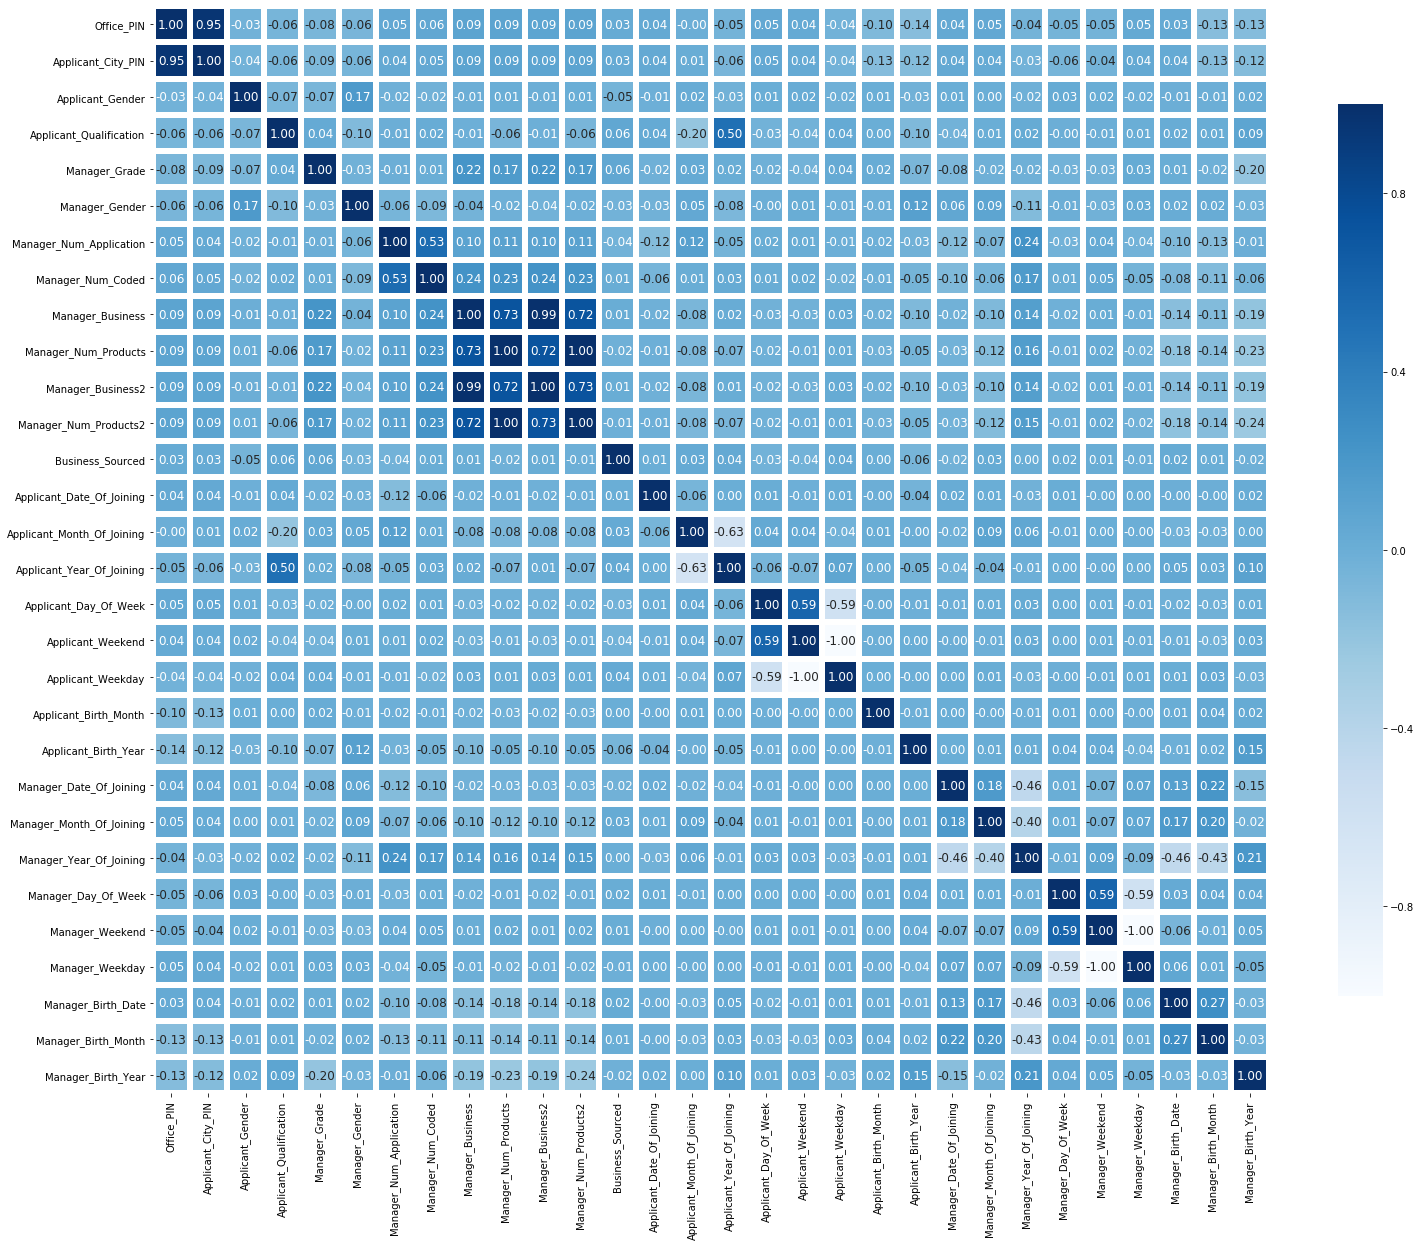

In [82]:
plt.figure(figsize = (25,20))
ax = sns.heatmap(data_copy.corr(method= 'pearson'), 
                 linewidths=5, 
                 annot=True, 
                 fmt='.2f',
                 cmap='Blues',
                 annot_kws={"size": 12}, 
                 cbar_kws={"shrink": .82},
                 vmin=-1, 
                 vmax=1, 
                 center= 0,
                 yticklabels=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
#plt.yticks(rotation = 0)      

<br>

In [88]:
data_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9527 entries, 0 to 9526
Data columns (total 33 columns):
Office_PIN                    9527 non-null int64
Applicant_City_PIN            9527 non-null float64
Applicant_Gender              9527 non-null int64
Applicant_Marital_Status      9527 non-null object
Applicant_Occupation          9527 non-null object
Applicant_Qualification       9527 non-null int64
Manager_Grade                 9527 non-null float64
Manager_Status                9527 non-null object
Manager_Gender                9527 non-null int64
Manager_Num_Application       9527 non-null float64
Manager_Num_Coded             9527 non-null float64
Manager_Business              9527 non-null float64
Manager_Num_Products          9527 non-null float64
Manager_Business2             9527 non-null float64
Manager_Num_Products2         9527 non-null float64
Business_Sourced              9527 non-null int64
Applicant_Date_Of_Joining     9527 non-null int64
Applicant_Month_Of_Joini

In [89]:
test_data_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5045 entries, 0 to 5044
Data columns (total 32 columns):
Office_PIN                    5045 non-null int64
Applicant_City_PIN            5045 non-null float64
Applicant_Gender              5045 non-null int64
Applicant_Marital_Status      5045 non-null object
Applicant_Occupation          5045 non-null object
Applicant_Qualification       5045 non-null int64
Manager_Grade                 5045 non-null float64
Manager_Status                5045 non-null object
Manager_Gender                5045 non-null int64
Manager_Num_Application       5045 non-null float64
Manager_Num_Coded             5045 non-null float64
Manager_Business              5045 non-null float64
Manager_Num_Products          5045 non-null float64
Manager_Business2             5045 non-null float64
Manager_Num_Products2         5045 non-null float64
Applicant_Date_Of_Joining     5045 non-null int64
Applicant_Month_Of_Joining    5045 non-null int64
Applicant_Year_Of_Joinin

In [90]:
data_copy.to_csv('data_copy1.csv')

In [91]:
data_copy.shape, test_data_copy.shape

((9527, 33), (5045, 32))

In [92]:
# Getting Dummies

data_copy_dummies = pd.get_dummies(data_copy)

test_data_copy_dummies = pd.get_dummies(test_data_copy)

In [93]:
data_copy_dummies.shape, test_data_copy_dummies.shape

((9527, 40), (5045, 39))

<br>

In [94]:
# Splitting Data 

X = data_copy_dummies.drop(columns = ['Business_Sourced'], axis = 1)

y = data_copy_dummies['Business_Sourced']

In [147]:
# import lightgbm as lg
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score

kfold = StratifiedKFold(n_splits=15, shuffle = True, random_state = 0)

predicts = []
scores   = []

for train_index, test_index in kfold.split(X, y):
    X_train, X_val = X.iloc[train_index], X.iloc[test_index]
    y_train, y_val = y.iloc[train_index], y.iloc[test_index]
   
    # Initializing Model
    model1 = lg.LGBMClassifier(n_estimators = 100,
                               subsample = 0.8,
                               num_leaves = 200,
                               max_depth = 7,
                               learning_rate = 0.01, 
                               colsample_bytree = 0.9)
    
    # Fitting Model
    model1.fit(X_train, y_train)
    
    # Making Prediction - Validation Data
    pred = model1.predict(X_val)
    
    score = roc_auc_score(pred, y_val)
    scores.append(score)
    
    predicts.append(model1.predict_proba(test_data_copy_dummies))
    

    print(score)

0.6429140127388535
0.7304278922345484
0.6079213184476343
0.5793650793650794
0.629635499207607
0.8309523809523809
0.579093799682035
0.7203585374511892
0.42777777777777776
0.769238437001595
0.4708826205641492
0.516048644338118
0.8304278922345483
0.5793650793650794
0.5108711513205896


In [148]:
score.mean()

0.5108711513205896

In [149]:
col = np.mean(predicts, 0)
col.shape

(5045, 2)

In [150]:
col

array([[0.70939974, 0.29060026],
       [0.62558332, 0.37441668],
       [0.69569903, 0.30430097],
       ...,
       [0.59655956, 0.40344044],
       [0.69006147, 0.30993853],
       [0.69866536, 0.30133464]])

In [151]:
list = [np.argmax(x) for x in col]
list

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [152]:
sample_submit = pd.read_csv('sample_submission.csv')

In [153]:
sample_submit['Business_Sourced'] = list

sample_submit.to_csv('sample_submission3.csv', index = False)

<br>

In [143]:
import lightgbm as lg
lg.LGBMClassifier()

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [146]:
from sklearn.model_selection import RandomizedSearchCV

param_grid = {
    'n_estimators'     : [100, 500, 1000, 5000],
    'subsample'        : [0.7, 0.8, 0.9],
    'colsample_bytree' : [0.7, 0.8, 0.9],
    'max_depth'        : [7, 8, 9, 10],
    'num_leaves'       : [50,100, 150, 200, 300],
    'learning_rate'    : [0.001, 0.01, 0.1]
}


# Using grid search with respective parameters
random_search_model = RandomizedSearchCV(model1, param_distributions=param_grid, cv=10, n_jobs=-1)

# Fitting the model
random_search_model.fit(X_train, y_train)

# Printing the best parameters
print('Best Parameters are:',random_search_model.best_params_)

Best Parameters are: {'subsample': 0.8, 'num_leaves': 200, 'n_estimators': 100, 'max_depth': 7, 'learning_rate': 0.01, 'colsample_bytree': 0.9}


<br>